# Participation and engagement

We use survey opinions.

### Data preparation

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
file_path = "../data/discussions_collab.csv"
df_comments_all = pd.read_csv(file_path)

file_path = "../data/pre_survey_anon.csv"
df_pre_all = pd.read_csv(file_path)


users_comments = df_comments_all['ParticipantID'].unique().astype(str)
users_pre = df_pre_all['ParticipantID'].unique().astype(str)
users = np.intersect1d(users_pre,users_comments)

print('pre | comments | shared: ', [len(users_pre),len(users_comments),len(users)])

topics = df_comments_all['post_title'].unique().astype(str)
topics_survey = ['issue_attitudes_ukraine','issue_attitudes_renewable','issue_attitudes_immigration','issue_attitudes_fur','issue_attitudes_ubi','issue_attitudes_vaccine','issue_attitudes_airbnb','issue_attitudes_gaza','issue_attitudes_sexwork','issue_attitudes_socialmedia','issue_attitudes_healthcare','issue_attitudes_bodycams','issue_attitudes_minwage','issue_attitudes_guns','issue_attitudes_loan','issue_attitudes_deathpenalty','issue_attitudes_climate','issue_attitudes_vegetarian','issue_attitudes_ai','issue_attitudes_gender']

#topics_survey_knowledge = [s.replace("_attitudes_", "_knowledge_") for s in topics_survey]

topics_survey_knowledge = ['issue_knowledge_ukraine', 'issue_knowledge_renewable', 'issue_knowledge_immigration', 'issue_knowledge_fur', 'issue_knowledge_ubi', 'issue_knowledge_vaccine', 'issue_knowledge_airbnb', 'issue_knowledge_mideast', 'issue_knowledge_sexwork', 'issue_knowledge_socialmedia', 'issue_knowledge_healthcare', 'issue_knowledge_bodycams', 'issue_knowledge_minwage', 'issue_knowledge_guns', 'issue_knowledge_loan', 'issue_knowledge_deathpenalty', 'issue_knowledge_climate', 'issue_knowledge_vegetarian', 'issue_knowledge_ai', 'issue_knowledge_gender']


print(topics_survey_knowledge)

subreddits = df_comments_all['subreddit'].unique().astype(str)

df_pre = df_pre_all[df_pre_all['ParticipantID'].isin(users)]
df_comments = df_comments_all[df_comments_all['ParticipantID'].isin(users)]


pre | comments | shared:  [788, 335, 334]
['issue_knowledge_ukraine', 'issue_knowledge_renewable', 'issue_knowledge_immigration', 'issue_knowledge_fur', 'issue_knowledge_ubi', 'issue_knowledge_vaccine', 'issue_knowledge_airbnb', 'issue_knowledge_mideast', 'issue_knowledge_sexwork', 'issue_knowledge_socialmedia', 'issue_knowledge_healthcare', 'issue_knowledge_bodycams', 'issue_knowledge_minwage', 'issue_knowledge_guns', 'issue_knowledge_loan', 'issue_knowledge_deathpenalty', 'issue_knowledge_climate', 'issue_knowledge_vegetarian', 'issue_knowledge_ai', 'issue_knowledge_gender']


In [162]:
consider = topics_survey.copy()  # Creates a new, independent copy of topics_survey
consider.extend(topics_survey_knowledge)
consider.append('ParticipantID')
consider.append('subreddit')
consider.append('gender')
consider.append('birthyear')
consider.append('education')
consider.append('time_online')
consider.append('social_media')
consider.append('comments_online')
consider.append('leftright')
consider.append('polinterest')
consider.append('affective_pol_1')
consider.append('affective_pol_2')

print(consider)

df_pre_atts = df_pre[consider]
df_pre_atts.shape

['issue_attitudes_ukraine', 'issue_attitudes_renewable', 'issue_attitudes_immigration', 'issue_attitudes_fur', 'issue_attitudes_ubi', 'issue_attitudes_vaccine', 'issue_attitudes_airbnb', 'issue_attitudes_gaza', 'issue_attitudes_sexwork', 'issue_attitudes_socialmedia', 'issue_attitudes_healthcare', 'issue_attitudes_bodycams', 'issue_attitudes_minwage', 'issue_attitudes_guns', 'issue_attitudes_loan', 'issue_attitudes_deathpenalty', 'issue_attitudes_climate', 'issue_attitudes_vegetarian', 'issue_attitudes_ai', 'issue_attitudes_gender', 'issue_knowledge_ukraine', 'issue_knowledge_renewable', 'issue_knowledge_immigration', 'issue_knowledge_fur', 'issue_knowledge_ubi', 'issue_knowledge_vaccine', 'issue_knowledge_airbnb', 'issue_knowledge_mideast', 'issue_knowledge_sexwork', 'issue_knowledge_socialmedia', 'issue_knowledge_healthcare', 'issue_knowledge_bodycams', 'issue_knowledge_minwage', 'issue_knowledge_guns', 'issue_knowledge_loan', 'issue_knowledge_deathpenalty', 'issue_knowledge_climate'

(334, 52)

### Issue knowledge and attitude strength

In [164]:
from scipy.stats import pearsonr

# Extract and flatten both column groups
attitudes = df_pre_atts.iloc[:, :20].values
#print(attitudes.shape)
attitudes = (attitudes-3.5)/2.5     # transform to [-1,1]
knowledge = df_pre_atts.iloc[:, 20:40].values
knowledge = (knowledge-1)/3     # transform to [0,1]
attitudes_strength = abs(attitudes)

# Compute correlation
correlation, p_value = pearsonr(attitudes_strength.ravel(), knowledge.ravel())  # Pearson correlation coefficient

print("Correlation between knowledge and attitude strength:", correlation, p_value)

Correlation between knowledge and attitude strength: 0.2323952391158623 1.2917468712424095e-82


### Number of comments per user and topic

In [165]:
num_comments = np.zeros(len(users))
num_comments_per_topic = np.zeros((len(users),len(topics)))
num_root_comments_per_topic = np.zeros((len(users),len(topics)))
len_comments_per_topic = np.zeros((len(users),len(topics)))

print(df_pre.shape)

#ux = 0
#for ix, row in df_pre_atts.iterrows(): 
#user = row['ParticipantID']
#print(ux)


for ux,user in enumerate(users):
    filtered_df = df_comments[df_comments['ParticipantID']==user]
    
    num_comments[ux] = len(filtered_df)
    #print( user)
    for tx,topic in enumerate(topics):
        attitudes[ux,tx] = df_pre_atts.loc[df_pre_atts['ParticipantID'] == user,topics_survey[tx]]
        knowledge[ux,tx] = df_pre_atts.loc[df_pre_atts['ParticipantID'] == user,topics_survey_knowledge[tx]]
        current_df = filtered_df[filtered_df['post_title']==topic]
        num_comments_per_topic[ux,tx]=len(current_df)
        posts = current_df['text_comment'].values
        for post in posts:
            len_comments_per_topic[ux,tx] += len(post)    
        current_df = current_df[current_df['root_comment']==1]
        num_root_comments_per_topic[ux,tx] = len(current_df)


attitudes = (attitudes-3.5)/2.5     # transform to [-1,1]
knowledge = (knowledge-1)/3     # transform to [0,1]
attitudes_strength = abs(attitudes)

engagement = num_comments_per_topic-num_root_comments_per_topic
        
#print(len_comments_per_topic.shape)
correlation, p_value = pearsonr(num_comments_per_topic.ravel(), knowledge.ravel())  # Pearson correlation coefficient
print("knowledge | number of comments:", correlation, p_value)

correlation, p_value = pearsonr(num_comments_per_topic.ravel(), attitudes.ravel())
print("attitudes | number of comments:", correlation, p_value)

correlation, p_value = pearsonr(num_comments_per_topic.ravel(), attitudes_strength.ravel())
print("attitude strength | number of comments:", correlation, p_value)

######

print()
correlation, p_value = pearsonr(len_comments_per_topic.ravel(), knowledge.ravel())  # Pearson correlation coefficient
print("knowledge | length of comments:", correlation, p_value)

correlation, p_value = pearsonr(len_comments_per_topic.ravel(), attitudes.ravel())
print("attitudes | length of comments:", correlation, p_value)

correlation, p_value = pearsonr(len_comments_per_topic.ravel(), attitudes_strength.ravel())
print("attitude strength | length of comments:", correlation, p_value)

######

print()
correlation, p_value = pearsonr(num_root_comments_per_topic.ravel(), knowledge.ravel())  # Pearson correlation coefficient
print("knowledge | root comments:", correlation, p_value)

correlation, p_value = pearsonr(num_root_comments_per_topic.ravel(), attitudes.ravel())
print("attitudes | root comments:", correlation, p_value)

correlation, p_value = pearsonr(num_root_comments_per_topic.ravel(), attitudes_strength.ravel())
print("attitude strength | root comments:", correlation, p_value)

(334, 91)


/var/folders/52/9916k5xs3kvdtcq2qd98b7x00000gn/T/ipykernel_88375/3704870964.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  attitudes[ux,tx] = df_pre_atts.loc[df_pre_atts['ParticipantID'] == user,topics_survey[tx]]
/var/folders/52/9916k5xs3kvdtcq2qd98b7x00000gn/T/ipykernel_88375/3704870964.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  knowledge[ux,tx] = df_pre_atts.loc[df_pre_atts['ParticipantID'] == user,topics_survey_knowledge[tx]]


knowledge | number of comments: 0.07059590328350898 7.648827939182036e-09
attitudes | number of comments: 0.008688337874320915 0.47771072780488416
attitude strength | number of comments: 0.010593611092214645 0.3866593557159976

knowledge | length of comments: 0.06273312891760413 2.876668499839621e-07
attitudes | length of comments: 0.005045879700841144 0.6800963995635501
attitude strength | length of comments: -0.0004482922918181626 0.9707779164068014

knowledge | root comments: 0.07037776320945617 8.50519737430695e-09
attitudes | root comments: -0.025959574332278735 0.03386551316576933
attitude strength | root comments: 0.0019478121569680654 0.8735368976725304


In [166]:

correlation, p_value = pearsonr(knowledge.ravel(), engagement.ravel())
print("attitude strength | number of comments:", correlation, p_value)

correlation, p_value = pearsonr(len_comments_per_topic.ravel(), attitudes.ravel())
print("attitude strength | number of comments:", correlation, p_value)


# Extract and flatten both column groups
attitudes = df_pre_atts.iloc[:, :20].values
#print(attitudes.shape)
attitudes = (attitudes-3.5)/2.5     # transform to [-1,1]
knowledge = df_pre_atts.iloc[:, 20:40].values
knowledge = (knowledge-1)/3     # transform to [0,1]
attitudes_strength = abs(attitudes)

correlation, p_value = pearsonr(knowledge.ravel(), engagement.ravel())
print("attitude strength | number of comments:", correlation, p_value)

correlation, p_value = pearsonr(len_comments_per_topic.ravel(), attitudes.ravel())
print("attitude strength | number of comments:", correlation, p_value)

#print(num_comments_per_topic-num_root_comments_per_topic)

attitude strength | number of comments: 0.056688244268524056 3.551076612572719e-06
attitude strength | number of comments: 0.005045879700841144 0.6800963995635501
attitude strength | number of comments: 0.03791106051176099 0.0019414018659011417
attitude strength | number of comments: 0.020971968490444498 0.08654098275064423


### User level data

/var/folders/52/9916k5xs3kvdtcq2qd98b7x00000gn/T/ipykernel_88375/70850411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr["num_comments"] = 0


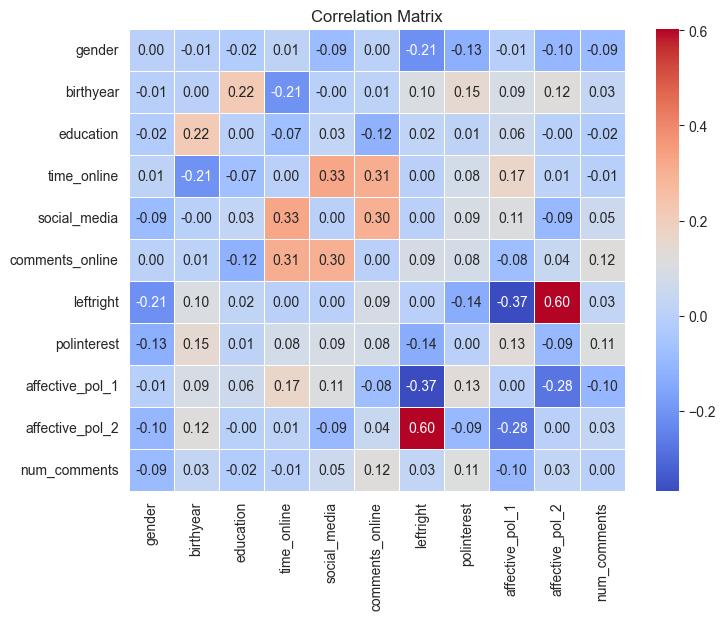

In [167]:
consider_here = ['ParticipantID','gender', 'birthyear', 'education', 'time_online', 'social_media', 'comments_online','leftright','polinterest','affective_pol_1','affective_pol_2']

df_corr = df_pre_atts[consider_here]

df_corr["num_comments"] = 0
for ux,user in enumerate(users):
    df_corr.loc[df_corr['ParticipantID']==user, 'num_comments'] = num_comments[ux]

consider_here.append('num_comments')
corr_matrix=df_corr[consider_here[1:]].corr()
np.fill_diagonal(corr_matrix.values, 0)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()


#print(num_comments)

In [93]:


correlations = np.array([pearsonr(data[:, i], data[:,2])[0] for i in range(data.shape[1])])
p_values = np.array([pearsonr(data[:, i], num_comments)[1] for i in range(data.shape[1])])
print(correlations)
print(p_values)


[-0.02224851  0.21679693  1.         -0.06959628  0.02826521 -0.11834565]
[0.65247126 0.26466682 0.58421619 0.59469982 0.97175787 0.89631689]


In [150]:
print(df_pre_atts['ParticipantID'].values)

['2b7239befb' '50cbb22c53' 'b26f58bafa' '8dc97c0017' 'a45d4da524'
 '7797803053' 'df388cac10' 'f8b776619d' 'e34e6c69cd' '718906de57'
 '536f973f0c' '37bf353fb9' 'df7db5830d' '4a0f87ca15' '7e3d73c71f'
 '051b66dd63' '6c7ba03f96' '14f53c4d15' '8db2c901ef' 'c634858b71'
 'ec8ac17cf5' '059ccca124' 'ba64177d75' '371a89c864' '0802ad39f4'
 'b210bd258a' '556e001949' '3afbc14807' '045319ee07' '065f4ecbef'
 'b7c05e27ff' '9d5641c981' '2931d384e5' '20755dab4b' 'af4371aedf'
 'a9c091a5f1' '4abf60bfbe' '60a0daaee1' 'f78baf629c' '5e310cb9be'
 '903fe72810' '87302bc516' '1bfa86d4d5' 'f35ab4d797' '69afc2f583'
 'ba2d6a922a' '475242e940' 'db848770fb' '792bdbdb21' '1202299dad'
 '51b0cf34b9' 'b9b30f05a7' 'cbb6c8de3b' 'd0ac6ce848' '56c957abaf'
 'a878f9f52d' '829dca52ce' 'dab17760f0' '9843ba5931' 'ab67c11202'
 '7a23fe4e17' 'd1211799fa' 'd29023384a' 'ac70fa02c4' '54b44b7ea2'
 '6d76e87001' '2e1aa99e21' '18ea3d5196' 'e51abce375' '2c53486d98'
 '4858d99a77' '2d50f9530e' 'f5bcb87763' '452eba80c3' '255bcf36bf'
 'efceae41

In [151]:
print(users)

['00470f18b5' '018cfd2fd6' '01eaa4802a' '020aacb6ae' '045319ee07'
 '0495eb6d4e' '0498d0071c' '04df080c10' '04e12eb8bc' '051b66dd63'
 '059ccca124' '06078fcbb9' '065f4ecbef' '078dea3f6c' '07fc81fc18'
 '0802ad39f4' '08e8f94943' '09c06efcff' '0a0d3fbdd8' '0c0cd85291'
 '0cc8f32fca' '0d3ed5ffc3' '0ee8c53e5f' '0fb7b9bbbb' '0feeffdf7d'
 '10b9887f41' '1136111b65' '1202299dad' '122c06368f' '12c968cca6'
 '1322eeba2f' '147f332297' '14cc0e35dd' '14f53c4d15' '18ea3d5196'
 '1b21190beb' '1bfa86d4d5' '1f74cab57c' '1ff83e22aa' '204d45d97c'
 '20746f99d2' '20755dab4b' '208ca50452' '20e8bf48c6' '20ea4d8991'
 '223213b557' '22ae244c18' '237429f688' '255bcf36bf' '26a6b1e27c'
 '270094e521' '27624d1b3e' '2931d384e5' '2a80129d50' '2b7239befb'
 '2c53486d98' '2c6a738e66' '2c6ca224be' '2c75aaa1a7' '2cb31d177d'
 '2d50f9530e' '2de40f95ad' '2e163001c9' '2e1aa99e21' '2e20e6d383'
 '2eb22b1c67' '2f299311e8' '2f4f0f5a5b' '30d05307ad' '321116e8ad'
 '325c2d07bb' '341ab933a9' '3434b72325' '371a89c864' '37bf353fb9'
 '3908e60e